# Eksplorasi Data dan Pra-Proses Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_help = pd.read_csv('/content/drive/MyDrive/SanberCode/Dataset/Data_Negara_HELP.csv')
df_help

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [ ]:
df_help.dtypes

Negara               object
Kematian_anak       float64
Ekspor              float64
Kesehatan           float64
Impor               float64
Pendapatan            int64
Inflasi             float64
Harapan_hidup       float64
Jumlah_fertiliti    float64
GDPperkapita          int64
dtype: object

In [ ]:
X = df_help.drop('Negara', axis=1)

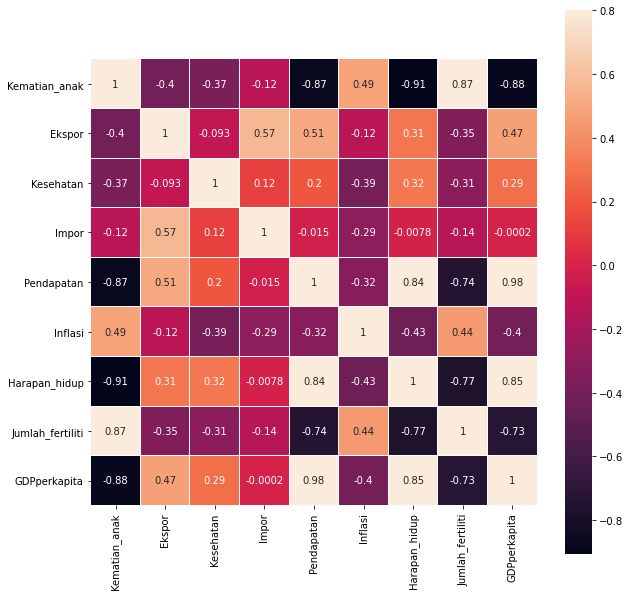

In [ ]:
#Korelasi data help
df_help_corr = df_help.corr(method = 'spearman')
plt.figure(figsize=(10,10))
sns.color_palette("rocket", as_cmap=True)
sns.heatmap(df_help_corr, vmax=0.8, linewidths=0.01 ,square=True, annot=True)
plt.show()

In [ ]:
columns = np.full((df_help_corr.shape[0],), True, dtype=bool)
for i in range(df_help_corr.shape[0]):
    for j in range(i+1, df_help_corr.shape[0]):
        if df_help_corr.iloc[i,j] >= -0.2:
            if columns[j]:
                columns[j] = False
selected_columns = X.columns[columns]
df_help_features = X[selected_columns]
df_help_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Kematian_anak  167 non-null    float64
 1   Ekspor         167 non-null    float64
dtypes: float64(2)
memory usage: 2.7 KB


In [ ]:
df_help_features

,Kematian_anak,Ekspor
0,90.2,10.0
1,16.6,28.0
2,27.3,38.4
3,119.0,62.3
4,10.3,45.5
...,...,...
162,29.2,46.6
163,17.1,28.5
164,23.3,72.0
165,56.3,30.0


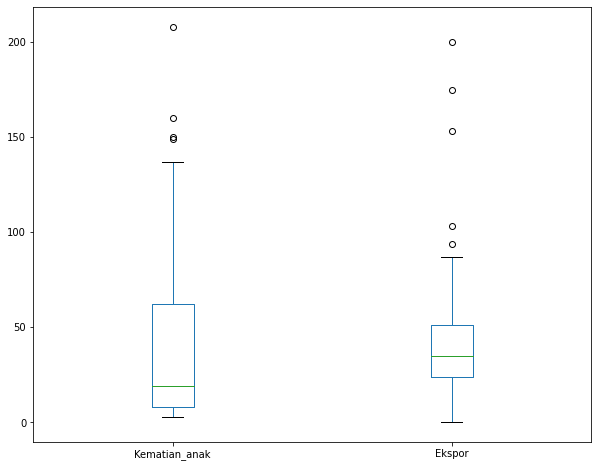

In [ ]:
#Menampilkan distribusi pada dataframe df_help_features menggunakan boxplot
df_help_features.plot(kind='box', figsize =(10,8))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


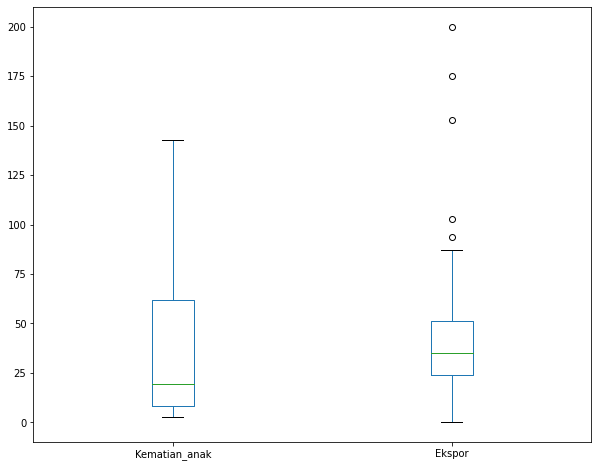

In [ ]:
#Menghilangkan outlier pada premi dengan teknik persentil
q3 = df_help_features['Kematian_anak'].quantile(0.75)
q1 = df_help_features['Kematian_anak'].quantile(0.25)
IQR = q3 - q1

upper_limit = q3 + (IQR * 1.5)
lower_limit = q1 - (IQR * 1.5)
df_help_features['Kematian_anak'] = df_help_features['Kematian_anak'].apply(lambda x: upper_limit if x > upper_limit else lower_limit if x < lower_limit else x)

#menampilkan boxplot kolom year setelah dihilangkan outliernya
df_help_features.plot(kind='box', figsize =(10,8))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


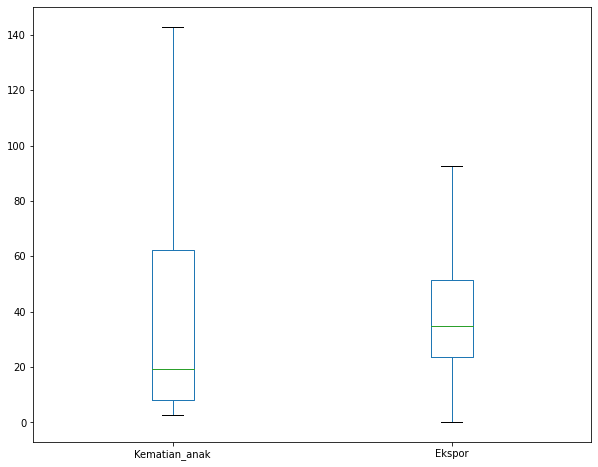

In [ ]:
#Menghilangkan outlier pada premi dengan teknik persentil
q3 = df_help_features['Ekspor'].quantile(0.75)
q1 = df_help_features['Ekspor'].quantile(0.25)
IQR = q3 - q1

upper_limit = q3 + (IQR * 1.5)
lower_limit = q1 - (IQR * 1.5)
df_help_features['Ekspor'] = df_help_features['Ekspor'].apply(lambda x: upper_limit if x > upper_limit else lower_limit if x < lower_limit else x)

#menampilkan boxplot kolom year setelah dihilangkan outliernya
df_help_features.plot(kind='box', figsize =(10,8))

In [ ]:
# Scaling df_help_features menggunakan minmax scaling
from sklearn import preprocessing #mengimport library untuk praproses data
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler() #mendafinisikan sc

#proses fueture scaling untuk data

hasilsc = sc.fit_transform(df_help_features)
df_help_minmax = pd.DataFrame(hasilsc, columns=df_help_features.columns)
display(df_help_minmax)

,Kematian_anak,Ekspor
0,0.624488,0.106853
1,0.099804,0.301309
2,0.176083,0.413662
3,0.829799,0.671856
4,0.054892,0.490364
...,...,...
162,0.189628,0.502247
163,0.103368,0.306711
164,0.147567,0.776646
165,0.382819,0.322916


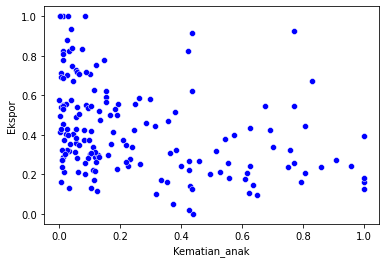

In [ ]:
#Mengecek sebaran data kematian anak dan ekspor sebelum proses clustering
sns.scatterplot(x='Kematian_anak', y='Ekspor', data=df_help_minmax, color='blue')

#Proses Clustering menggunakan K-Means

In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 0, 'Cluster')

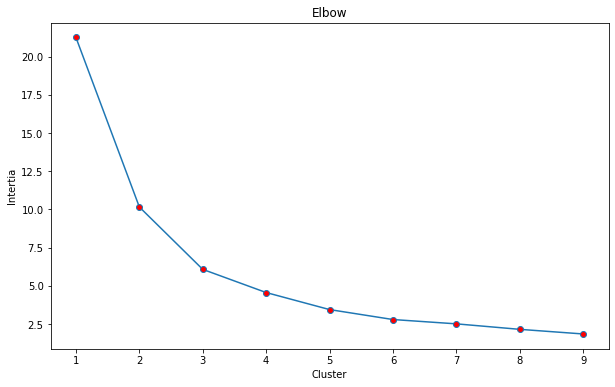

In [ ]:
cluster = []
list_k = list(range(1, 10))
for i in list_k:
  km = KMeans(n_clusters=i).fit(df_help_minmax)
  cluster.append(km.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(list_k, cluster, marker='o', markerfacecolor ='red')
plt.title('Elbow')
plt.ylabel('Intertia')
plt.xlabel('Cluster')

In [ ]:
km3 = KMeans(n_clusters=3).fit(df_help_minmax)

df_help_minmax['Label'] = km3.labels_

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


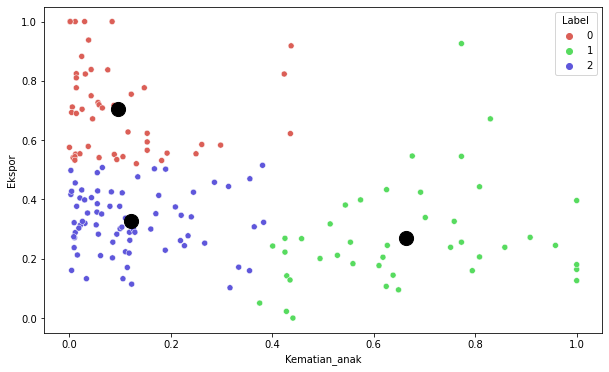

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    df_help_minmax['Kematian_anak'],
    df_help_minmax['Ekspor'],
    hue=df_help_minmax['Label'],
    # label=['Cluster 1', 'Cluster 2', 'Cluster 3'],
    palette=sns.color_palette('hls', 3) 
)

centers = km3.cluster_centers_
plt.scatter(centers[:,0], 
            centers[:,1], 
            c='black', 
            s=200, 
            alpha=1, 
            marker='o'
)

# Kesimpulan

In [ ]:
df_bantuan = pd.DataFrame([df_help['Negara'] , df_help_minmax['Label']]).transpose()
# df_bantuan.reset_index(inplace=True)

In [ ]:
df_bantuan

,Negara,Label
0,Afghanistan,1
1,Albania,2
2,Algeria,2
3,Angola,1
4,Antigua and Barbuda,2
...,...,...
162,Vanuatu,2
163,Venezuela,2
164,Vietnam,0
165,Yemen,2


In [ ]:
np.array(df_bantuan[df_bantuan['Label'] == 1]['Negara'])

array(['Afghanistan', 'Angola', 'Benin', 'Burkina Faso', 'Burundi',
       'Cameroon', 'Central African Republic', 'Chad', 'Comoros',
       'Congo, Dem. Rep.', "Cote d'Ivoire", 'Equatorial Guinea',
       'Eritrea', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Haiti',
       'India', 'Kenya', 'Kiribati', 'Lao', 'Lesotho', 'Liberia',
       'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mozambique',
       'Myanmar', 'Niger', 'Nigeria', 'Pakistan', 'Rwanda', 'Senegal',
       'Sierra Leone', 'Sudan', 'Tanzania', 'Timor-Leste', 'Togo',
       'Uganda', 'Zambia'], dtype=object)